## InSe EELS Thickness Evaluation:

In [1]:
#import all we need --> set ipympl for inline graphic interaction
import matplotlib.pyplot as plt
import hyperspy.api as hs
import numpy as np
import exspy
import scipy
import os
import mplcyberpunk
import matplotlib 

plt.style.use('cyberpunk')
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
#need to be set for the interactive GUI
%matplotlib ipympl


## Calibration of the Energy Scale from 2D EEls spectra shifted by know Energy

In [61]:
## load 2D spectral data for energy calibration
Energy_shift_eV = 70
Ref_Spekt1 = hs.load(filenames="/masc_shared/ag_volz/pn_data/OM/raw_data/2024_InSe/2024_06_25_SO020_InSe/InSe_CrossSection_012_noEshift.tif", signal_type = 'EELS')
Ref_Spekt2 = hs.load(filenames="/masc_shared/ag_volz/pn_data/OM/raw_data/2024_InSe/2024_06_25_SO020_InSe/InSe_CrossSection_014_70eV_shift.tif", signal_type = 'EELS')

In [54]:
## MAG 2: EELS MAP setup
Energy_shift_eV = 60
fp = "/masc_shared/ag_volz/pn_data/OM/raw_data/2024_InSe/2024_06_25_SO020_InSe/"
Ref_Spekt1 = hs.load(filenames=os.path.join(fp,'MAG2_Spot5C_EELs_Enta2_CLA2_120umeV_dispersion_e_shift270.tif'), signal_type = 'EELS')
Ref_Spekt2 = hs.load(filenames=os.path.join(fp,'MAG2_Spot5C_EELs_Enta2_CLA2_120umeV_dispersion_e_shift330eV.tif'), signal_type = 'EELS')

In [62]:
## add both images for calibration
Calibration_Spekt = Ref_Spekt1+Ref_Spekt2

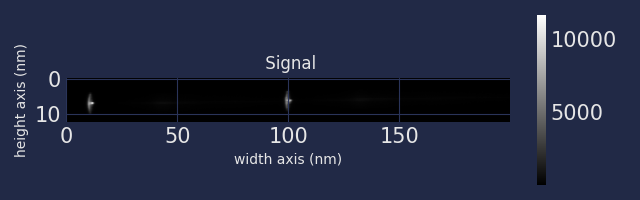

In [63]:
## plot with interactive spectrum extraction
Calibration_Spekt.plot()

In [64]:
## plot line - data 1
segments = [[[3.6,6.8],[197.4,5.1]]]
linewidth = 25 ##use to select integration width
Line_marker = hs.plot.markers.Lines(segments, transform='data',linewidth=linewidth, colors=(0.0, 1, 1, 0.5),linestyles='solid')
Calibration_Spekt.add_marker(Line_marker)

In [ ]:
## plot line - data 2
segments = [[[0.35,6.9],[8.3,0.9]]]
linewidth = 25 ##use to select integration width
Line_marker = hs.plot.markers.Lines(segments, transform='data',linewidth=linewidth, colors=(0.0, 1, 1, 0.5),linestyles='solid')
Calibration_Spekt.add_marker(Line_marker)

In [65]:
## measure the rotation angle needed if image should be rotated
ROI_Line = hs.roi.Line2DROI(x1=segments[0][0][0], y1=segments[0][0][1], x2=segments[0][1][0], y2=segments[0][1][1], linewidth=5)
Rot_Angle = ROI_Line.angle(axis='horizontal', units='degrees')
# ROI_Line.gui()

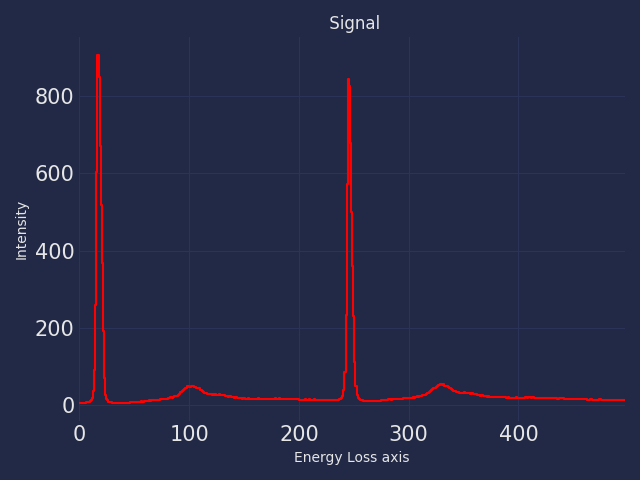

/home/massmeye/.conda/envs/4dstem/lib/python3.11/site-packages/jupyter_client/session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


In [66]:
## extract spectrum from ROI
Calibration_Spekt = ROI_Line.profile_line(    
    Calibration_Spekt.data,
    segments[0][0],
    segments[0][1],
    [Ref_Spekt1.axes_manager[0], Ref_Spekt1.axes_manager[1]],
    linewidth=linewidth,
    order=1,
    mode='constant',
    cval=0.0,
)


#needs to be converted to Signal
Calibration_Spekt = hs.signals.Signal1D(Calibration_Spekt)
#define axis name
Calibration_Spekt.axes_manager[0].name = "Energy Loss"
Calibration_Spekt.plot()
#calibrate Energy scale
Calibration_Spekt.calibrate()

In [67]:
## readout energy scale
Energy_scale = Calibration_Spekt.axes_manager[0].scale
print('Energy Scale:', Energy_scale, ' eV/channel')

Energy Scale: 0.3056768558951965  eV/channel


## Old Approach --> has nice visualization from 2D data 

In [39]:
#define navigation dimension -- needed for visualization
Ref_Spekt1.axes_manager[0].name = "Energy Loss"
Ref_Spekt1.axes_manager[0].units = "px"
Ref_Spekt1.axes_manager[0].scale = 1 
Ref_Spekt1.axes_manager[1].name = "Navigation Axis"
Ref_Spekt1.axes_manager[1].units = "px"
Ref_Spekt1.axes_manager[1].scale = 1 
Ref_Spekt1.axes_manager[1].navigate = True

Ref_Spekt2.axes_manager[0].name = "Energy Loss"
Ref_Spekt2.axes_manager[0].units = "px"
Ref_Spekt2.axes_manager[0].scale = 1 
Ref_Spekt2.axes_manager[1].name = "Navigation Axis"
Ref_Spekt2.axes_manager[1].units = "px"
Ref_Spekt2.axes_manager[1].scale = 1 
Ref_Spekt2.axes_manager[1].navigate = True



In [24]:
## plot with interactive spectrum extraction
Ref_Spekt1.plot()

In [10]:
Ref_Spekt1.plot()

Line2DROI(x1=1, y1=1, x2=10, y2=1, linewidth=5)

In [5]:
## get the sum along the navigation axis --> strange that the axis navigation has to be set to false to convert to signal
Ref_Spekt1_sum = Ref_Spekt1.sum(axis=0)
Ref_Spekt1_sum.axes_manager[0].navigate = False

Ref_Spekt2_sum = Ref_Spekt2.sum(axis=0)
Ref_Spekt2_sum.axes_manager[0].navigate = False

#add the spectra for calibration
Calibration_Spekt = Ref_Spekt1_sum.data + Ref_Spekt2_sum.data

#convert to signal
Calibration_Spekt = hs.signals.Signal1D(Calibration_Spekt)
Calibration_Spekt.axes_manager[0].name = "Energy Loss"

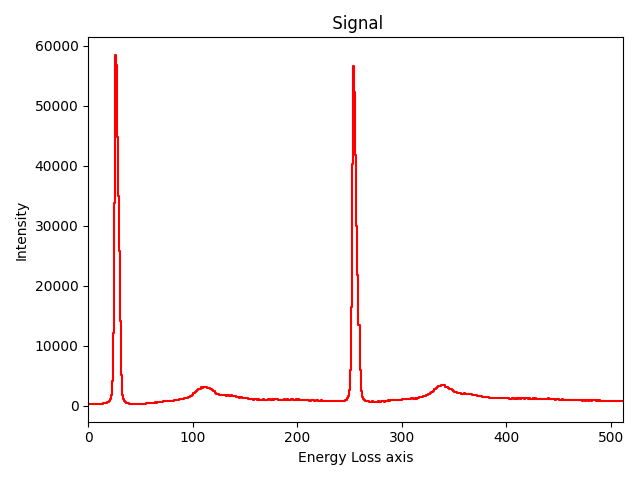

/home/massmeye/.conda/envs/4dstem/lib/python3.11/site-packages/jupyter_client/session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


The module://ipympl.backend_nbagg matplotlib backend is not compatible with the traitsui GUI elements. For more information, read http://hyperspy.readthedocs.io/en/stable/user_guide/getting_started.html#possible-warnings-when-importing-hyperspy.


In [6]:
Calibration_Spekt.plot()
Calibration_Spekt.calibrate()

In [7]:
## readout energy scale
Energy_scale = Calibration_Spekt.axes_manager[0].scale
print('Energy Scale:', Energy_scale, ' eV/channel')

Energy Scale: 0.30837004405286345  eV/channel


## Load the actual data

In [2]:
## load the data from the dm3 files: Sapphire
fp = "/masc_shared/ag_volz/pn_data/OM/raw_data/2024_InSe/2024_06_25_SO020_InSe/"
SPOT1 = hs.load(filenames="/masc_shared/ag_volz/pn_data/OM/raw_data/2024_InSe/2024_06_25_SO020_InSe/InSe_CrossSection_CLA2_ENTA2_300umDisp_CL50cm002_SPOT1.tif", signal_type = 'EELS')
SPOT2 = hs.load(filenames="/masc_shared/ag_volz/pn_data/OM/raw_data/2024_InSe/2024_06_25_SO020_InSe/InSe_CrossSection_CLA2_ENTA2_300umDisp_CL50cm003_SPOT2.tif", signal_type = 'EELS')

SPOT3 = hs.load(filenames="/masc_shared/ag_volz/pn_data/OM/raw_data/2024_InSe/2024_06_25_SO020_InSe/InSe_CrossSection_CLA2_ENTA2_300umDisp_CL50cm004_SPOT3.tif", signal_type = 'EELS')
SPOT4 = hs.load(filenames="/masc_shared/ag_volz/pn_data/OM/raw_data/2024_InSe/2024_06_25_SO020_InSe/InSe_CrossSection_CLA2_ENTA2_300umDisp_CL50cm005_SPOT4.tif", signal_type = 'EELS')
SPOT5 = hs.load(filenames="/masc_shared/ag_volz/pn_data/OM/raw_data/2024_InSe/2024_06_25_SO020_InSe/InSe_CrossSection_CLA2_ENTA2_300umDisp_CL50cm006_SPOT5.tif", signal_type = 'EELS')
SPOT6 = hs.load(filenames="/masc_shared/ag_volz/pn_data/OM/raw_data/2024_InSe/2024_06_25_SO020_InSe/InSe_CrossSection_CLA2_ENTA2_300umDisp_CL50cm007_SPOT6.tif", signal_type = 'EELS')

VAC = hs.load(filenames="/masc_shared/ag_volz/pn_data/OM/raw_data/2024_InSe/2024_06_25_SO020_InSe/InSe_CrossSection_CLA2_ENTA2_300umDisp_CL50cm009_vacuum_ZLP.tif", signal_type = 'EELS')

#select spect
Spekt2D = SPOT6

In [235]:
## load the data from the dm3 files: spots2
fp = "/masc_shared/ag_volz/pn_data/OM/raw_data/2024_InSe/2024_06_25_SO020_InSe/"
SPOT1 = hs.load(filenames="/masc_shared/ag_volz/pn_data/OM/raw_data/2024_InSe/2024_06_25_SO020_InSe/InSe_CrossSection_CLA2_ENTA2_300umDisp_CL50cm011_SPOT1.tif", signal_type = 'EELS')
SPOT2 = hs.load(filenames="/masc_shared/ag_volz/pn_data/OM/raw_data/2024_InSe/2024_06_25_SO020_InSe/InSe_CrossSection_CLA2_ENTA2_300umDisp_CL50cm012_SPOT2.tif", signal_type = 'EELS')
SPOT3 = hs.load(filenames="/masc_shared/ag_volz/pn_data/OM/raw_data/2024_InSe/2024_06_25_SO020_InSe/InSe_CrossSection_CLA2_ENTA2_300umDisp_CL50cm013_SPOT3.tif", signal_type = 'EELS')
SPOT4 = hs.load(filenames="/masc_shared/ag_volz/pn_data/OM/raw_data/2024_InSe/2024_06_25_SO020_InSe/InSe_CrossSection_CLA2_ENTA2_300umDisp_CL50cm014_SPOT4.tif", signal_type = 'EELS')
SPOT5 = hs.load(filenames="/masc_shared/ag_volz/pn_data/OM/raw_data/2024_InSe/2024_06_25_SO020_InSe/InSe_CrossSection_CLA2_ENTA2_300umDisp_CL50cm015_SPOT5.tif", signal_type = 'EELS')

#select spect
Spekt2D = SPOT5

In [169]:
## Load the MAG 2 data
fp = "/masc_shared/ag_volz/pn_data/OM/raw_data/2024_InSe/2024_06_25_SO020_InSe/"
SPOT1 = hs.load(filenames=os.path.join(fp,'MAG2_Spot5C_EELs_Enta2_CLA2_120umeV_dispersion_e_shift270eV106_sapphire_spot1.tif'), signal_type = 'EELS')
SPOT2 = hs.load(filenames=os.path.join(fp,'MAG2_Spot5C_EELs_Enta2_CLA2_120umeV_dispersion_e_shift270eV107_InSe_Spot2.tif'), signal_type = 'EELS')
SPOT3 = hs.load(filenames=os.path.join(fp,'MAG2_Spot5C_EELs_Enta2_CLA2_120umeV_dispersion_e_shift270eV108_C_Spot3.tif'), signal_type = 'EELS')
SPOT4 = hs.load(filenames=os.path.join(fp,'MAG2_Spot5C_EELs_Enta2_CLA2_120umeV_dispersion_e_shift270eV109_W_Spot4.tif'), signal_type = 'EELS')
SPOT5 = hs.load(filenames=os.path.join(fp,'MAG2_Spot5C_EELs_Enta2_CLA2_120umeV_dispersion_e_shift270eV110_W_Spot5.tif'), signal_type = 'EELS')
ZLP_POS = hs.load(filenames=os.path.join(fp,'MAG2_Spot5C_EELs_Enta2_CLA2_120umeV_dispersion_e_shift330eV.tif'), signal_type = 'EELS')

#select spect
Spekt2D = ZLP_POS

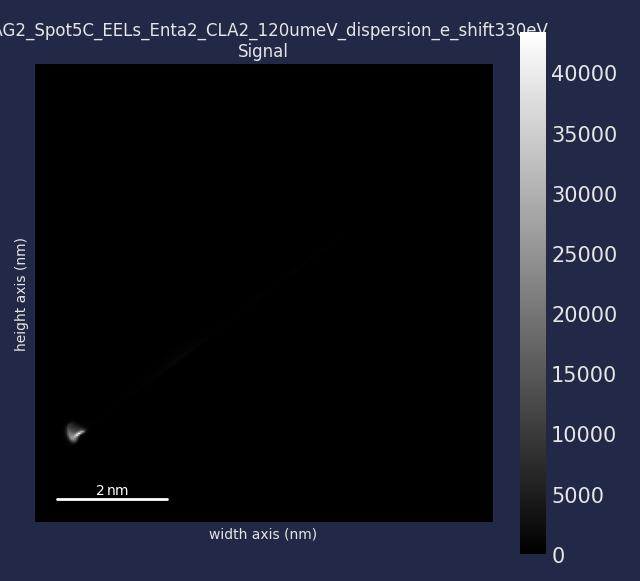

In [170]:
## plot with interactive spectrum extraction
Spekt2D.plot()
## plot line
segments = [[[0.1,7.2],[8.3,0.9]]]
linewidth = 25 ##use to select integration width
Line_marker = hs.plot.markers.Lines(segments, transform='data',linewidth=linewidth, colors=(0.0, 1, 1, 0.5),linestyles='solid')
Spekt2D.add_marker(Line_marker)

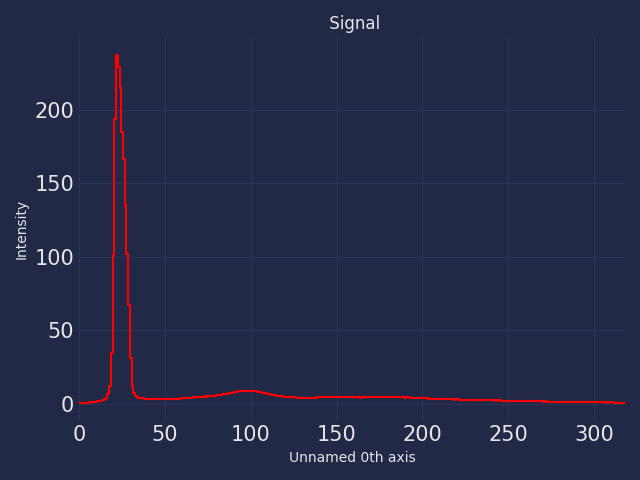

In [171]:
## extract spectrum from ROI

## define ROI and measure the rotation angle needed if image should be rotated
ROI_Line = hs.roi.Line2DROI(x1=segments[0][0][0], y1=segments[0][0][1], x2=segments[0][1][0], y2=segments[0][1][1], linewidth=linewidth)
Rot_Angle = ROI_Line.angle(axis='horizontal', units='degrees')

## create spectrum
Region1 = ROI_Line.profile_line(    
    Spekt2D.data,
    segments[0][0],
    segments[0][1],
    [Ref_Spekt1.axes_manager[0], Ref_Spekt1.axes_manager[1]],
    linewidth=linewidth,
    order=1,
    mode='constant',
    cval=0.0,
)
#needs to be converted to Signal
Region1 = hs.signals.Signal1D(Region1)
Region1.set_signal_type('EELS')
Region1.plot()

In [172]:
# caibrate scale and units
Region1.axes_manager[0].name = 'Energy Loss'
Region1.axes_manager[0].scale = Energy_scale # either it is  known or you can use the calibrate gui to calibrate the scale
Region1.axes_manager[0].units = 'eV'
# Region1.axes_manager[0].offset = ZLP_Offset - additional_shift #needed for Edges --> additional Eshift should be known
Region1.axes_manager[0].offset = ZLP_Offset #needed for Edges --> additional Eshift should be known
# set microscope parameters
Region1.set_microscope_parameters(
    beam_energy=200,
    convergence_angle=21, #CLA2
    collection_angle=15, # ENTA2
    toolkit=None,
    display=True,
)

In [41]:
#shift ZLP to zero
Region1.align_zero_loss_peak(calibrate=True, 
                                      also_align=[], 
                                      print_stats=True, 
                                      subpixel=True, 
                                      mask=None, 
                                      signal_range=None, 
                                      show_progressbar=True, 
                                      crop=True)

Initial ZLP position statistics
-------------------------------
Summary statistics
------------------
mean:	7.63
std:	0

min:	7.63
Q1:	7.63
median:	7.63
Q3:	7.63
max:	7.63


In [43]:
## Store ZLP Offset
ZLP_Offset = Region1.axes_manager[0].offset
ZLP_Offset

-7.630057803468208

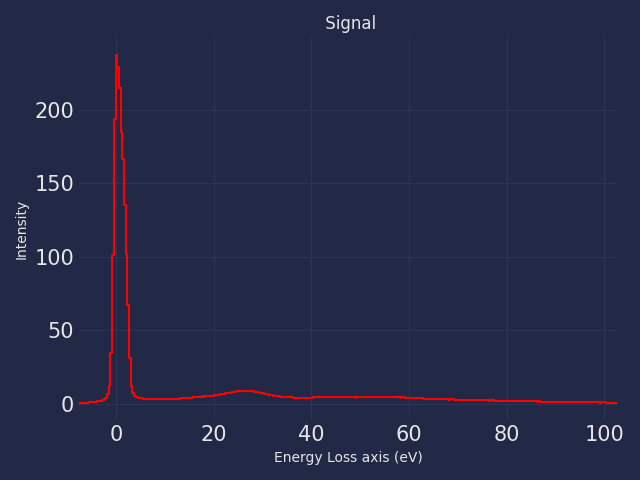

In [173]:
# plot the calibrated spectrum
Region1.plot()
plt.yscale("log") # set "linear", "log", "symlog", "logit"

In [132]:
##peak finder #position’, ‘height’, and ‘width
peaks = Region1.find_peaks1D_ohaver(    
    xdim=None,
    slope_thresh=0.01,
    amp_thresh=0.1,
    subchannel=False, ## True makes wierd height and width values !!
    medfilt_radius=5,
    maxpeakn=4,
    peakgroup=10,
    num_workers=None,
)

## add peaks as point markers
for eintrag in peaks[0]:
    # print(eintrag[0:1])
    offset = [eintrag[0],eintrag[1]]
    Region1.add_marker(hs.plot.markers.Points(offset))


[########################################] | 100% Completed | 102.15 ms
[########################################] | 100% Completed | 202.10 ms

/home/massmeye/.conda/envs/4dstem/lib/python3.11/site-packages/hyperspy/_signals/signal1d.py:150: UserWarning: kernel_size exceeds volume extent: the volume will be zero-padded.
  d = np.gradient(medfilt(y, medfilt_radius))



[########################################] | 100% Completed | 301.73 ms
[########################################] | 100% Completed | 401.59 ms
[########################################] | 100% Completed | 502.14 ms
[########################################] | 100% Completed | 601.28 ms


In [126]:
## Store Plasmon peak position

Plasmon_Peak1 = peaks[0][1][0]
Plasmon_Peak1

34.335260115606935

In [133]:
## Store Plasmon peak position2

Plasmon_Peak2 = peaks[0][0][0]
Plasmon_Peak2

13.526011560693641

In [135]:
#calculate additiional shift: -20 eV
additional_shift = Plasmon_Peak2 - Plasmon_Peak1
additional_shift

-20.809248554913296

In [44]:
#Calculate t/y with treshold --> set to the end of the 
thickness = Region1.estimate_thickness(
    threshold=2/Region1.axes_manager[0].scale)

thickness.data

Computing the thickness without taking into account the effect of the limited collection angle, what usually leads to underestimating the thickness. To perform the angular corrections you must provide the density of the material.
Computing the relative thickness. To compute the absolute thickness provide the `mean_free_path` and/or the `density`


array([0.44391219])

In [45]:
## calculate mean free path: Malis equation or Iakoubovskii ( for large collection angles > 10 mrad @ 200 kV)
E_0 = 200 # acceleration Voltage in kV
rho = 19.25 # material density in g/cm³ # rho(Al2O3) = 3.98 g/cm³, rho(InSe) = 5.8, rho(C) = 2.2, rho(W) = 19.25
F = (1+E_0/1022)/(1+E_0/511)**2 # relativisic correction factor
alpha = 21 #convergence angle mrad
beta = 15 # collection angle mrad 
delta = abs(alpha**2-beta**2)
Theta_E = (5.5*rho**0.3)/(F*E_0)
Theta_C = 20 # mrad 

# #Iakoubovskii  https://doi.org/10.1002/jemt.20597
mean_free_path_Iakoubovskii  = ((200*F*E_0)/(11*rho**0.3))/np.log((alpha**2+beta**2+2*Theta_E**2+delta**2)/(alpha**2+beta**2+2*Theta_C**2+delta**2)*(Theta_C**2/Theta_E**2))
print('Iakoubovskii:', mean_free_path_Iakoubovskii)

## Malis only valid for small collection angles
E_m = 15.9 # eV for Al2o3
mean_free_path_Malis = (106*F*(E_0/E_m))/(np.log(2*beta*E_0/E_m))
print('Malis:', mean_free_path_Malis)

Iakoubovskii: 88.72464084806394
Malis: 138.7947300975339


In [46]:
thickness = Region1.estimate_thickness(
    threshold=2/Region1.axes_manager[0].scale, density=19.25 ,
    mean_free_path=mean_free_path_Iakoubovskii)

thickness.data

array([41.98165098])

In [174]:
#save the extracted spectrum using os and metadate to autogenerate filename and location

fn = Spekt2D.metadata.General.original_filename ## use originally loaded filename
ffn = os.path.join(fp, os.path.splitext(os.path.basename(fn))[0] + '_extracted_spectrum')
ffn

#save hspy data
Region1.save(
    filename=ffn,
    overwrite=False,
    extension='HSPY'
)

## Plot the Stored

In [3]:
## create compiled plot --> load the stored data
fp = "/masc_shared/ag_volz/pn_data/OM/raw_data/2024_InSe/2024_06_25_SO020_InSe/"

SPOT1 = hs.load(filenames=os.path.join(fp,'InSe_CrossSection_CLA2_ENTA2_300umDisp_CL50cm002_SPOT1_extracted_spectrum.HSPY'), signal_type = 'EELS')
SPOT2 = hs.load(filenames=os.path.join(fp,'InSe_CrossSection_CLA2_ENTA2_300umDisp_CL50cm003_SPOT2_extracted_spectrum.HSPY'), signal_type = 'EELS')
SPOT3 = hs.load(filenames=os.path.join(fp,'InSe_CrossSection_CLA2_ENTA2_300umDisp_CL50cm004_SPOT3_extracted_spectrum.HSPY'), signal_type = 'EELS')
SPOT4 = hs.load(filenames=os.path.join(fp,'InSe_CrossSection_CLA2_ENTA2_300umDisp_CL50cm005_SPOT4_extracted_spectrum.HSPY'), signal_type = 'EELS')
SPOT5 = hs.load(filenames=os.path.join(fp,'InSe_CrossSection_CLA2_ENTA2_300umDisp_CL50cm006_SPOT5_extracted_spectrum.HSPY'), signal_type = 'EELS')
SPOT6 = hs.load(filenames=os.path.join(fp,'InSe_CrossSection_CLA2_ENTA2_300umDisp_CL50cm007_SPOT6_extracted_spectrum.HSPY'), signal_type = 'EELS')
VAC = hs.load(filenames=os.path.join(fp,'InSe_CrossSection_CLA2_ENTA2_300umDisp_CL50cm009_vacuum_ZLP_extracted_spectrum.HSPY'), signal_type = 'EELS')



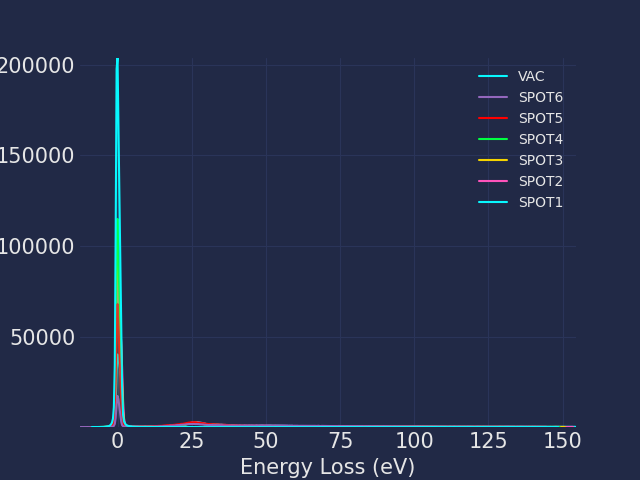

In [4]:
##plot

hs.plot.plot_spectra([SPOT1,SPOT2,SPOT3,SPOT4,SPOT5,SPOT6,VAC],
    style='overlap',
    color=None,
    linestyle=None,
    drawstyle='default',
    padding=1.0,
    legend=['SPOT1','SPOT2','SPOT3','SPOT4','SPOT5','SPOT6','VAC'],
    legend_picking=True,
    legend_loc='upper right',
    fig=None,
    ax=None,
    auto_update=None,
)
plt.ylabel('Intensity',fontsize=15)
plt.xlabel('Energy Loss (eV)',fontsize=15)
# plt.grid(color='#00d2ff',linewidth=2)
plt.yscale("linear") # set "linear", "log", "symlog", "logit"
mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.2)

In [247]:
## create compiled plot --> load the stored data
fp = "/masc_shared/ag_volz/pn_data/OM/raw_data/2024_InSe/2024_06_25_SO020_InSe/"

SPOT1 = hs.load(filenames=os.path.join(fp,'InSe_CrossSection_CLA2_ENTA2_300umDisp_CL50cm011_SPOT1_extracted_spectrum.HSPY'), signal_type = 'EELS')
SPOT2 = hs.load(filenames=os.path.join(fp,'InSe_CrossSection_CLA2_ENTA2_300umDisp_CL50cm012_SPOT2_extracted_spectrum.HSPY'), signal_type = 'EELS')
SPOT3 = hs.load(filenames=os.path.join(fp,'InSe_CrossSection_CLA2_ENTA2_300umDisp_CL50cm013_SPOT3_extracted_spectrum.HSPY'), signal_type = 'EELS')
SPOT4 = hs.load(filenames=os.path.join(fp,'InSe_CrossSection_CLA2_ENTA2_300umDisp_CL50cm014_SPOT4_extracted_spectrum.HSPY'), signal_type = 'EELS')
SPOT5 = hs.load(filenames=os.path.join(fp,'InSe_CrossSection_CLA2_ENTA2_300umDisp_CL50cm015_SPOT5_extracted_spectrum.HSPY'), signal_type = 'EELS')


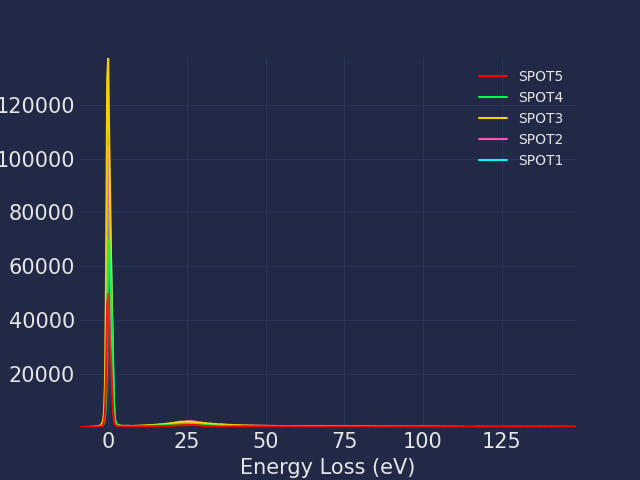

In [248]:
##plot

hs.plot.plot_spectra([SPOT1,SPOT2,SPOT3,SPOT4,SPOT5],
    style='overlap',
    color=None,
    linestyle=None,
    drawstyle='default',
    padding=1.0,
    legend=['SPOT1','SPOT2','SPOT3','SPOT4','SPOT5'],
    legend_picking=True,
    legend_loc='upper right',
    fig=None,
    ax=None,
    auto_update=None,
)
plt.ylabel('Intensity',fontsize=15)
plt.xlabel('Energy Loss (eV)',fontsize=15)
# plt.grid(color='#00d2ff',linewidth=2)
plt.yscale("linear") # set "linear", "log", "symlog", "logit"
mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.2)

In [175]:
## create compiled plot --> load the stored data
fp = "/masc_shared/ag_volz/pn_data/OM/raw_data/2024_InSe/2024_06_25_SO020_InSe/"

SPOT1 = hs.load(filenames=os.path.join(fp,'MAG2_Spot5C_EELs_Enta2_CLA2_120umeV_dispersion_e_shift270eV106_sapphire_spot1_extracted_spectrum.HSPY'), signal_type = 'EELS')
SPOT2 = hs.load(filenames=os.path.join(fp,'MAG2_Spot5C_EELs_Enta2_CLA2_120umeV_dispersion_e_shift270eV107_InSe_Spot2_extracted_spectrum.HSPY'), signal_type = 'EELS')
SPOT3 = hs.load(filenames=os.path.join(fp,'MAG2_Spot5C_EELs_Enta2_CLA2_120umeV_dispersion_e_shift270eV108_C_Spot3_extracted_spectrum.HSPY'), signal_type = 'EELS')
SPOT4 = hs.load(filenames=os.path.join(fp,'MAG2_Spot5C_EELs_Enta2_CLA2_120umeV_dispersion_e_shift270eV109_W_Spot4_extracted_spectrum.HSPY'), signal_type = 'EELS')
SPOT5 = hs.load(filenames=os.path.join(fp,'MAG2_Spot5C_EELs_Enta2_CLA2_120umeV_dispersion_e_shift270eV110_W_Spot5_extracted_spectrum.HSPY'), signal_type = 'EELS')
ZLP = hs.load(filenames=os.path.join(fp,'MAG2_Spot5C_EELs_Enta2_CLA2_120umeV_dispersion_e_shift330eV_extracted_spectrum.HSPY'), signal_type = 'EELS')

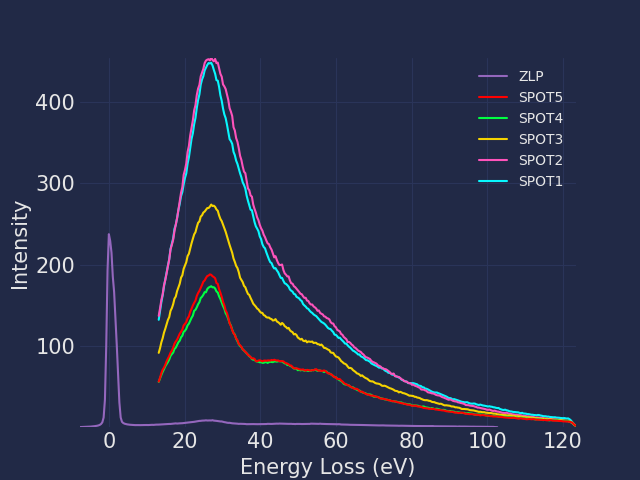

In [176]:
##plot

hs.plot.plot_spectra([SPOT1,SPOT2,SPOT3,SPOT4,SPOT5,ZLP],
    style='overlap',
    color=None,
    linestyle=None,
    drawstyle='default',
    padding=1.0,
    legend=['SPOT1','SPOT2','SPOT3','SPOT4','SPOT5','ZLP'],
    legend_picking=True,
    legend_loc='upper right',
    fig=None,
    ax=None,
    auto_update=None,
)
plt.ylabel('Intensity',fontsize=15)
plt.xlabel('Energy Loss (eV)',fontsize=15)
# plt.grid(color='#00d2ff',linewidth=2)
plt.yscale("linear") # set "linear", "log", "symlog", "logit"
# mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.2)

## Background 

In [19]:
#make a real copy (deep copy)

Spekt1_calibrated = Region1.deepcopy()
Spekt1_deconvolved = Region1.deepcopy()
Spekt1_background_sub = Region1.deepcopy()
Spekt1_deconvolved_rl = Region1.deepcopy()
ZLP = Region1.deepcopy()

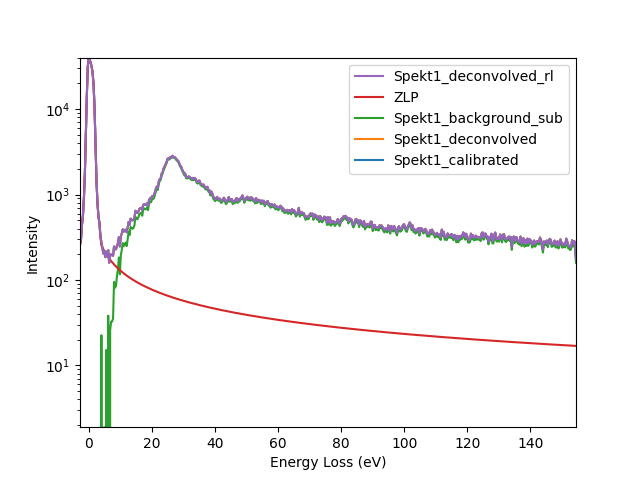

In [28]:
#plot multiple spectra in one figure
hs.plot.plot_spectra([Spekt1_calibrated,Spekt1_deconvolved,Spekt1_background_sub,ZLP,Spekt1_deconvolved_rl],
    style='overlap',
    color=None,
    linestyle=None,
    drawstyle='default',
    padding=1.0,
    legend=['Spekt1_calibrated','Spekt1_deconvolved','Spekt1_background_sub','ZLP','Spekt1_deconvolved_rl'],
    legend_picking=True,
    legend_loc='upper right',
    fig=None,
    ax=None,
    auto_update=None,
)

plt.yscale("log") # set "linear", "log", "symlog", "logit"

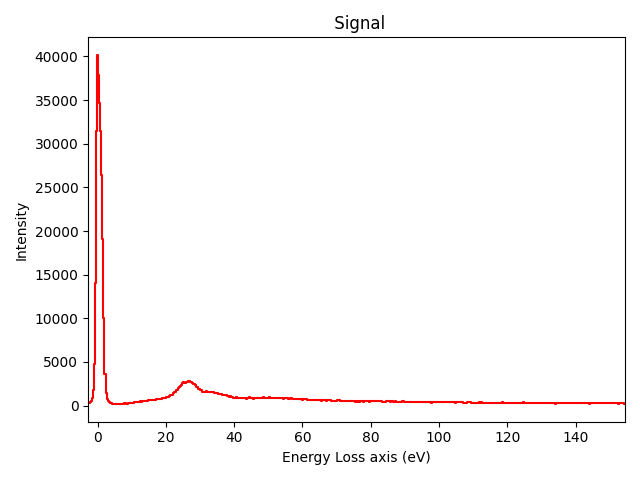

In [21]:
Spekt1_background_sub.plot()
plt.yscale("log") # set "linear", "log", "symlog", "logit"

In [22]:
Spekt1_background_sub.remove_background(signal_range='interactive',
    background_type='Power law',
    polynomial_order=5,
    fast=False,
    zero_fill=True,
    plot_remainder=True,
    show_progressbar=None,
    return_model=True,
    display=True,
    toolkit=None,
)

/home/massmeye/.conda/envs/4dstem/lib/python3.11/site-packages/jupyter_client/session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


<Model1D>

In [23]:
#calculate the ZLP
ZLP = ZLP-Spekt1_background_sub

In [24]:
ZLP

<EELSSpectrum, title: , dimensions: (|511)>

In [222]:
ZLP.change_dtype('float')
Spekt1_deconvolved.change_dtype('float')

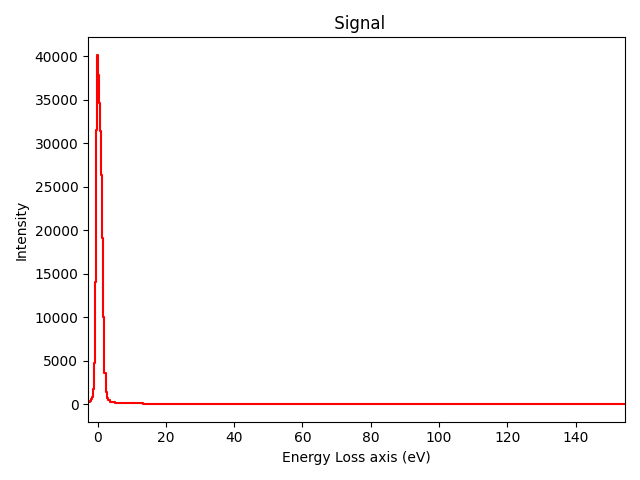

In [25]:
ZLP.plot()

In [26]:
#easy method to extract the ZLP width
ZLP_width = ZLP.estimate_peak_width(
    factor=0.5,
    window=None,
    return_interval=False,
    show_progressbar=None,
    num_workers=None,
)
ZLP_width.data[0]

2.012091432764616

In [27]:
#### for low less deconvolution --> needs ZLP !
Spekt1_deconvolved = Spekt1_deconvolved.fourier_log_deconvolution(
    ZLP,
    add_zlp=False,
    crop=False,
)


TypeError: The data dtype should be `float`. It can be changed by using the `change_dtype('float')` method of the signal.

In [27]:
## spectrum deconvolution by richardson_lucy --> enhancing resolution of the EELS spectrum
Spekt1_deconvolved_rl = Spekt1_deconvolved_rl.richardson_lucy_deconvolution(
    Spekt1_deconvolved_rl,
    iterations=15, # high numbers of iterations can create artifacts next to the ZLP
    show_progressbar=None,
    num_workers=None,
)

UFuncTypeError: Cannot cast ufunc 'multiply' output from dtype('float64') to dtype('uint64') with casting rule 'same_kind'

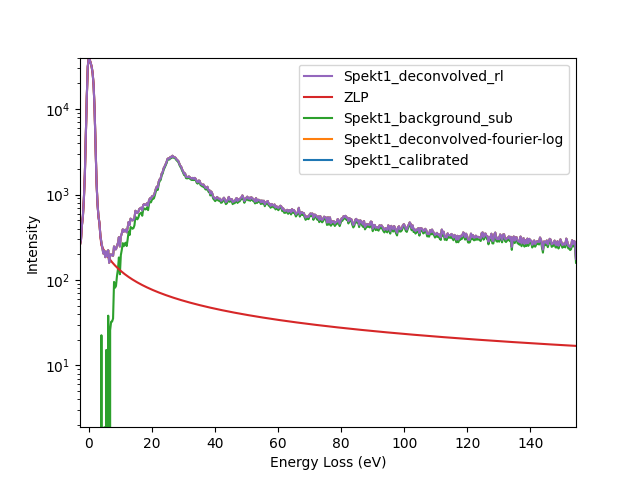

In [29]:
#plot multiple spectra in one figure
hs.plot.plot_spectra([Spekt1_calibrated,Spekt1_deconvolved,Spekt1_background_sub,ZLP,Spekt1_deconvolved_rl],
    style='overlap',
    color=None,
    linestyle=None,
    drawstyle='default',
    padding=1.0,
    legend=['Spekt1_calibrated','Spekt1_deconvolved-fourier-log','Spekt1_background_sub','ZLP','Spekt1_deconvolved_rl'],
    legend_picking=True,
    legend_loc='upper right',
    fig=None,
    ax=None,
    auto_update=None,
)

plt.yscale("log") # set "linear", "log", "symlog", "logit"

In [30]:
#ZLP after richardson_lucy_deconvolution
Spekt1_deconvolved_rl_width = Spekt1_deconvolved_rl.estimate_peak_width(
    factor=0.5,
    window=None,
    return_interval=False,
    show_progressbar=None,
    num_workers=None,
)
Spekt1_deconvolved_rl_width.data[0]

2.0120914390766056

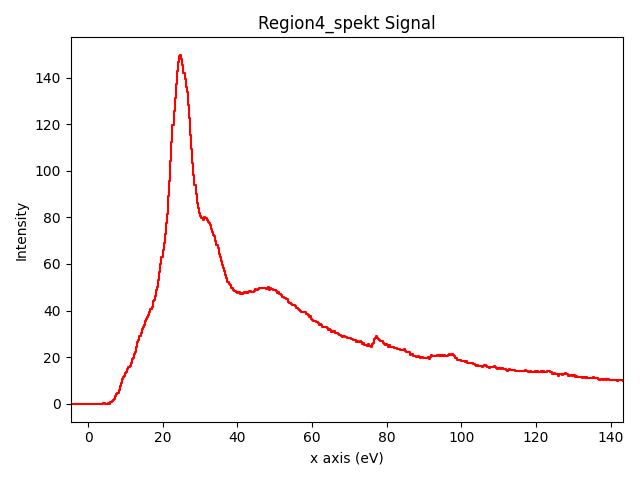

In [125]:
#Aim: Fit Spectrum with model
# Spekt1_deconvolved_rl.plot()
Spekt1_background_sub.plot()
# plt.yscale("log") # set "linear", "log", "symlog", "logit"

In [127]:
#save bkg_sub data
fp = '/masc_shared/ag_volz/Oliver_Maßmeyer/EELS/thickness/Region4_spekt'
Spekt1_background_sub.save(
    filename=fp,
    overwrite=False,
    extension='HSPY'
)

In [9]:
#load all calibrated specta

## load the data from the dm3 files: Al2O3
Region1 = hs.load(filenames="/masc_shared/ag_volz/Oliver_Maßmeyer/EELS/thickness/Region1_spekt.HSPY", signal_type = 'EELS')
Region2 = hs.load(filenames="/masc_shared/ag_volz/Oliver_Maßmeyer/EELS/thickness/Region2_spekt.HSPY", signal_type = 'EELS')
Region3 = hs.load(filenames="/masc_shared/ag_volz/Oliver_Maßmeyer/EELS/thickness/Region3_spekt.HSPY", signal_type = 'EELS')
Region4 = hs.load(filenames="/masc_shared/ag_volz/Oliver_Maßmeyer/EELS/thickness/Region4_spekt.HSPY", signal_type = 'EELS')

## load the data from the dm3 files: InSe
InSe_Region1 = hs.load(filenames="/masc_shared/ag_volz/Oliver_Maßmeyer/EELS/thickness/InSe_Region1_spekt.HSPY", signal_type = 'EELS')
InSe_Region2 = hs.load(filenames="/masc_shared/ag_volz/Oliver_Maßmeyer/EELS/thickness/InSe_Region2_spekt.HSPY", signal_type = 'EELS')
InSe_Region3 = hs.load(filenames="/masc_shared/ag_volz/Oliver_Maßmeyer/EELS/thickness/InSe_Region3_spekt.HSPY", signal_type = 'EELS')
InSe_Region4 = hs.load(filenames="/masc_shared/ag_volz/Oliver_Maßmeyer/EELS/thickness/InSe_Region4_spekt.HSPY", signal_type = 'EELS')


In [177]:
#test cyberpunk: https://github.com/dhaitz/mplcyberpunk
import sys
!{sys.executable} -m pip install mplcyberpunk


In [11]:

import mplcyberpunk

# plt.style.use("cyberpunk")

# plt.plot([1, 3, 9, 5, 2, 1, 1], marker='o')
# plt.plot([4, 5, 5, 7, 9, 8, 6], marker='o')

mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.5)

# plt.show()

ValueError: Axis limits cannot be NaN or Inf

In [ ]:
plt.

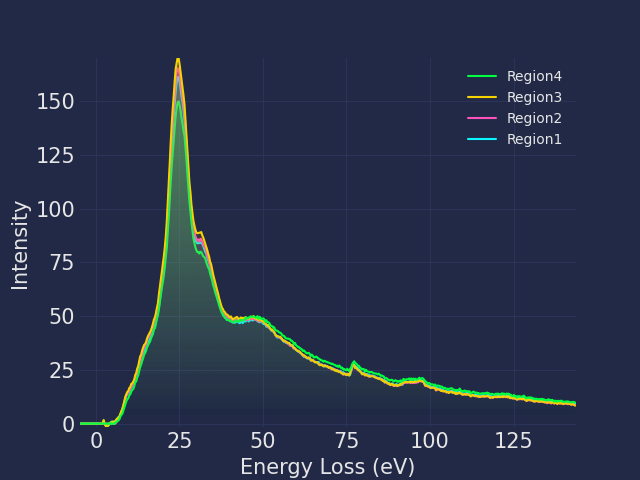

In [14]:
#plot multiple spectra in one figure
#checkout: https://github.com/dhaitz/matplotlib-stylesheets

# plt.style.use('seaborn-v0_8-darkgrid')
# plt.style.use('seaborn-v0_8-whitegrid')
# plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
# plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
# plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pacoty.mplstyle')
import matplotlib 
plt.style.use('cyberpunk')
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
# matplotlib.rc('font', {}) 
hs.plot.plot_spectra([Region1,Region2,Region3,Region4],
    style='overlap',
    color=None,
    linestyle=None,
    drawstyle='default',
    padding=1.0,
    legend=['Region1','Region2','Region3','Region4'],
    legend_picking=True,
    legend_loc='upper right',
    fig=None,
    ax=None,
    auto_update=None,
)
plt.ylabel('Intensity',fontsize=15)
plt.xlabel('Energy Loss (eV)',fontsize=15)
# plt.grid(color='#00d2ff',linewidth=2)
plt.yscale("linear") # set "linear", "log", "symlog", "logit"
mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.2)


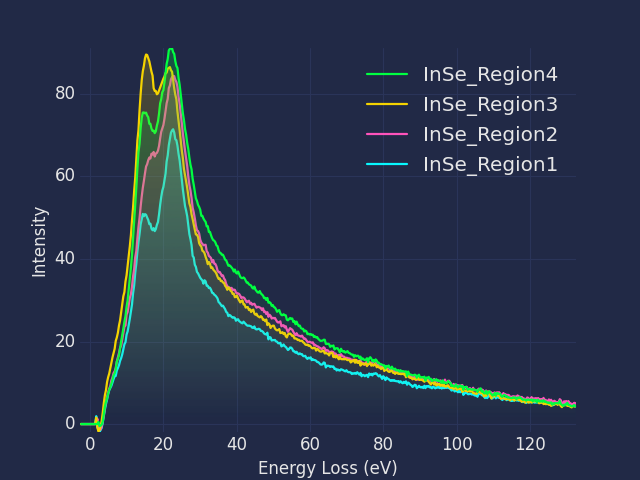

In [235]:
hs.plot.plot_spectra([InSe_Region1,InSe_Region2,InSe_Region3,InSe_Region4],
    style='overlap',
    color=None,
    linestyle=None,
    drawstyle='default',
    padding=1.0,
    legend=['InSe_Region1','InSe_Region2','InSe_Region3','InSe_Region4'],
    legend_picking=True,
    legend_loc='upper right',
    fig=None,
    ax=None,
    auto_update=None,
)
plt.ylabel('Intensity',fontsize=15)
plt.xlabel('Energy Loss (eV)',fontsize=15)
# plt.grid(color='#00d2ff',linewidth=2)
plt.yscale("linear") # set "linear", "log", "symlog", "logit"
mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.2)


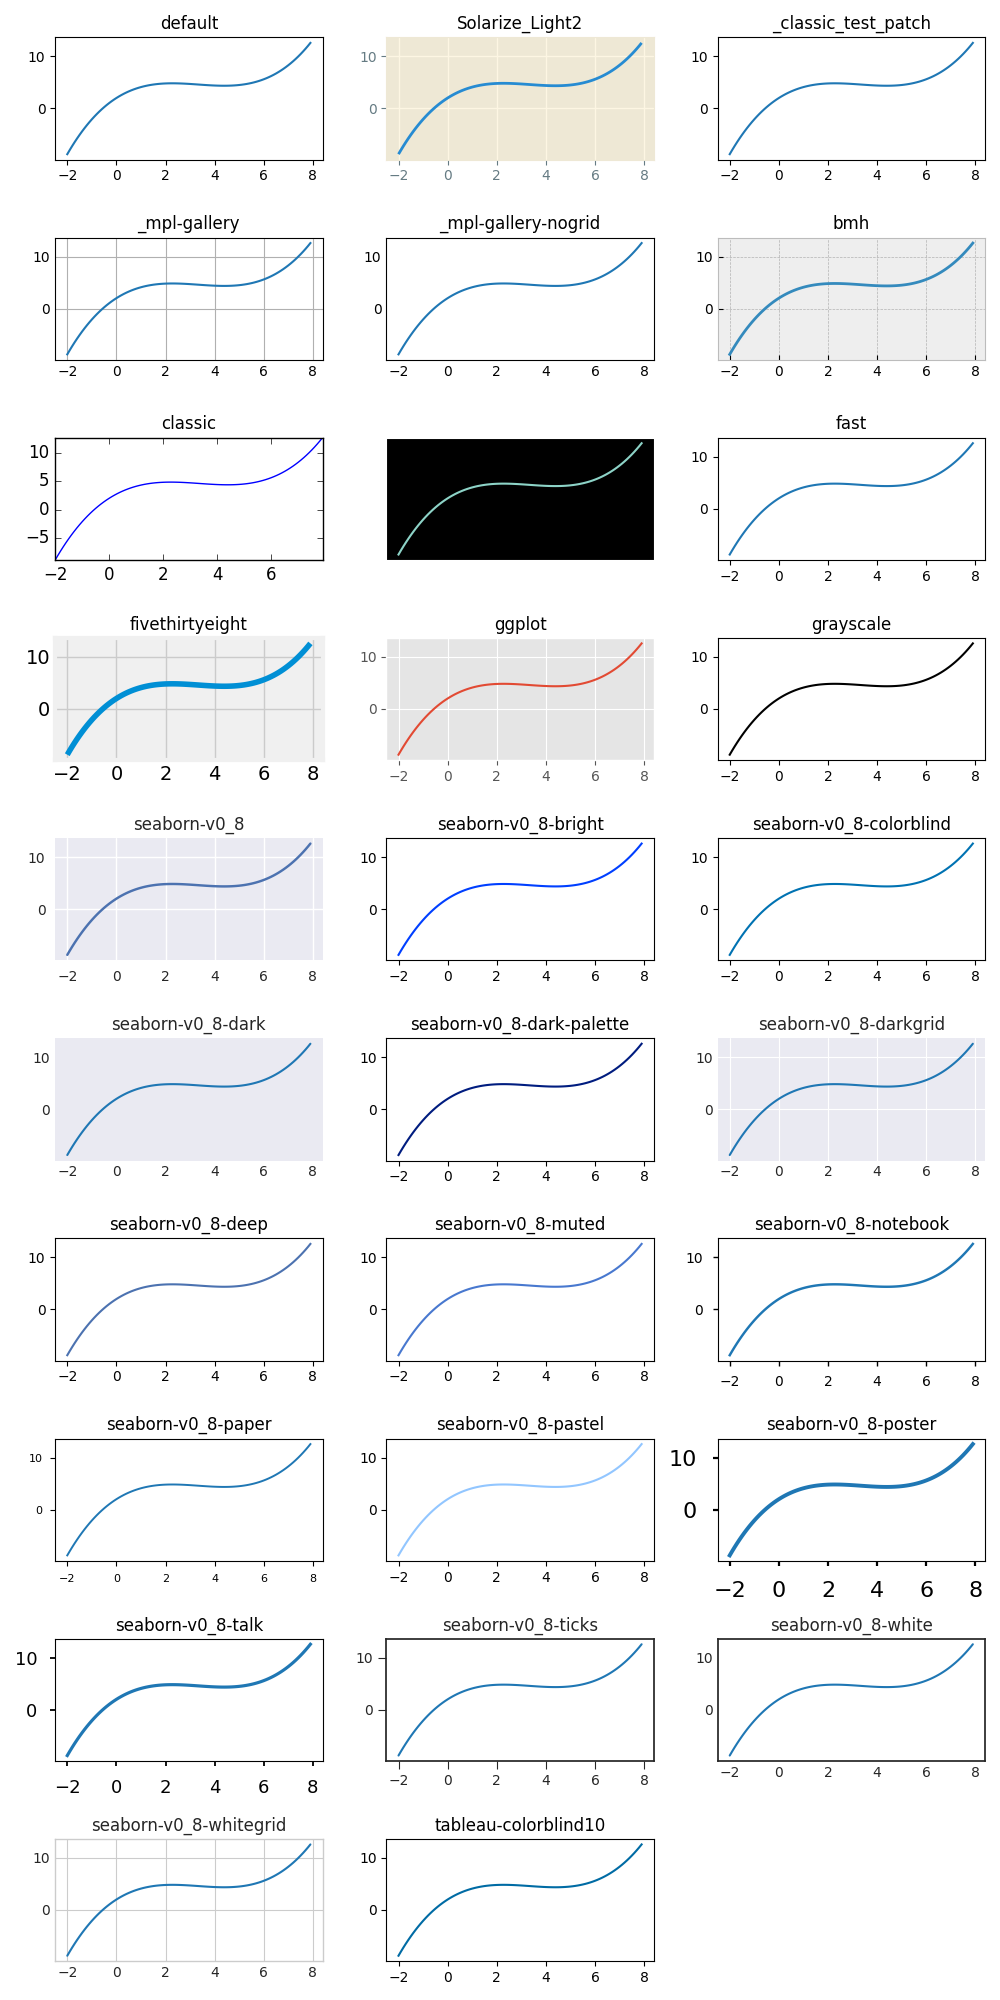

In [13]:
## checkout the matplotlib styles
plt.style.use('default')
fig = plt.figure(dpi=100, figsize=(10, 20), tight_layout=True)
available = ['default'] + plt.style.available
x = np.arange(-2, 8, .1)
y = .1 * x ** 3 - x ** 2 + 3 * x + 2
for i, style in enumerate(available):
    with plt.style.context(style):
        ax = fig.add_subplot(10, 3, i + 1)
        ax.plot(x, y)
    ax.set_title(style)

In [24]:
Spekt1_background_sub.crop_signal()

/home/massmeye/.conda/envs/ABTEM/lib/python3.11/site-packages/jupyter_client/session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


In [28]:
Spekt1_background_sub.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EELS
│       │       └── collection_angle = 15
│       ├── beam_energy = 200
│       └── convergence_angle = 21
├── General
│   ├── FileIO
│   │   └── 0
│   │       ├── hyperspy_version = 2.1.0
│   │       ├── io_plugin = rsciio.digitalmicrograph
│   │       ├── operation = load
│   │       └── timestamp = 2024-05-28T15:01:41.341317+02:00
│   ├── original_filename = Region1_spekt.dm3
│   └── title = Region1_spekt
└── Signal
    ├── Noise_properties
    │   └── Variance_linear_model
    │       ├── gain_factor = 1.0
    │       └── gain_offset = 0.0
    ├── quantity = Intensity
    └── signal_type = EELS

In [39]:

# #add the elements
# Spekt1_background_sub.add_elements(('Al', 'O','C'))
# Spekt1_background_sub.elements.clear
#create model
m = Spekt1_background_sub.create_model(
    # low_loss=Spekt1_deconvolved_rl, #since it is a low loss spectrum
    auto_background=False,
    # auto_add_edges=False,
    # GOS='gosh',
    # gos_file_path=None,
    # dictionary=None,
)


#extend model by Gaussians
#ZLP
g1 = hs.model.components1D.Gaussian(
    A=1.0,
    sigma=1.0,
    centre=25,
    module=None,
)

# edge = hs.model.components1D.Erf(
#     A=1.0,
#     sigma=1.0,
#     origin=9,
#     module=['numpy', 'scipy'],
# )

#Plasmon Peak
g2 = hs.model.components1D.Gaussian(
    A=1.0,
    sigma=1.0,
    centre=32,
    module=None,
)

#Plasmon Peak
g3 = hs.model.components1D.Gaussian(
    A=1.0,
    sigma=1.0,
    centre=49,
    module=None,
)

# m.append(edge)
m.append(g1)
m.append(g2)
m.append(g3)

In [40]:
m.components

   # |      Attribute Name |      Component Name |      Component Type
---- | ------------------- | ------------------- | -------------------
   0 |            Gaussian |            Gaussian |            Gaussian
   1 |          Gaussian_0 |          Gaussian_0 |            Gaussian
   2 |          Gaussian_1 |          Gaussian_1 |            Gaussian

In [42]:
# fit the model to the data
m.multifit(kind='smart')

In [43]:
m.enable_adjust_position()

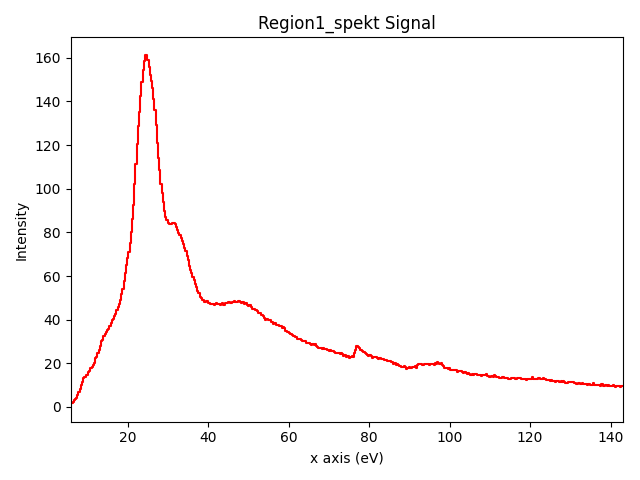

In [41]:
m.plot()


## Simple example of the model fitting with a Gaussian for the ZLP

In [119]:
#model fitting to the ZLP 
ZLP_model = ZLP.create_model(
    low_loss=None,
    auto_background=False,
    auto_add_edges=False,
    GOS='gosh',
    gos_file_path=None,
    dictionary=None,
)
ZLP_model


<EELSModel, title: Region1_spekt>

In [120]:
#create a Gaussian model
g1 = hs.model.components1D.Gaussian(
    A=1.0,
    sigma=1.0,
    centre=0.0,
    module=None,
)

In [121]:
ZLP_model.append(g1)
ZLP_model.components

   # |      Attribute Name |      Component Name |      Component Type
---- | ------------------- | ------------------- | -------------------
   0 |            Gaussian |            Gaussian |            Gaussian

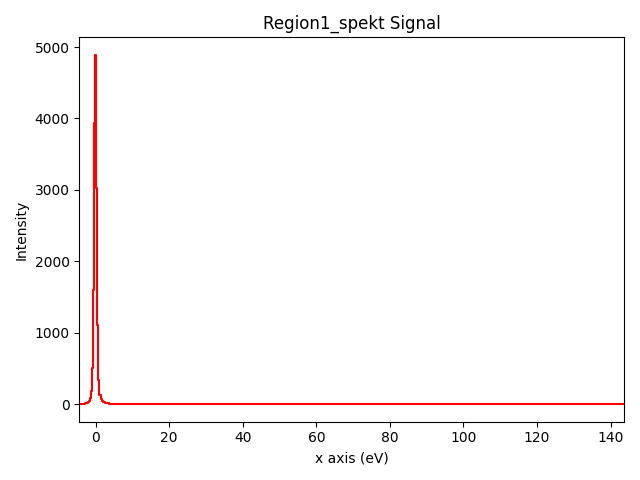

In [122]:
ZLP.plot()
plt.yscale("log") # set "linear", "log", "symlog", "logit"

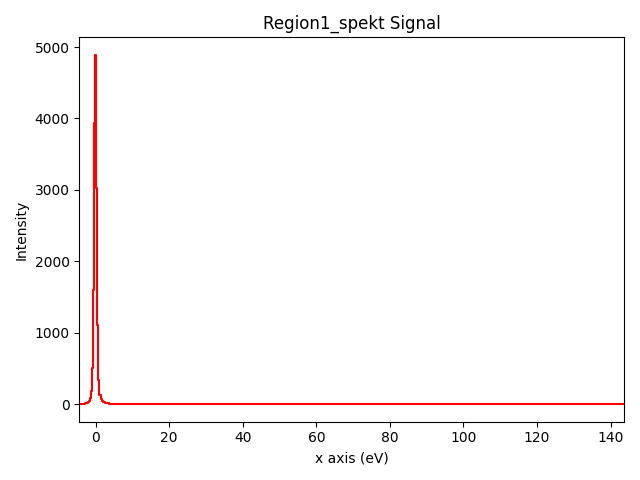

In [123]:
#can be used to fit only one component of the model --> here only one present
ZLP_model.fit_component(g1)
plt.yscale("linear") # set "linear", "log", "symlog", "logit"

In [137]:
#get sigma value and calculate the FWHM
g1.sigma.value

ZLP_width_fit = 2*(2*np.log(2))**(1/2)*g1.sigma.value
ZLP_width_fit

0.871880897218661

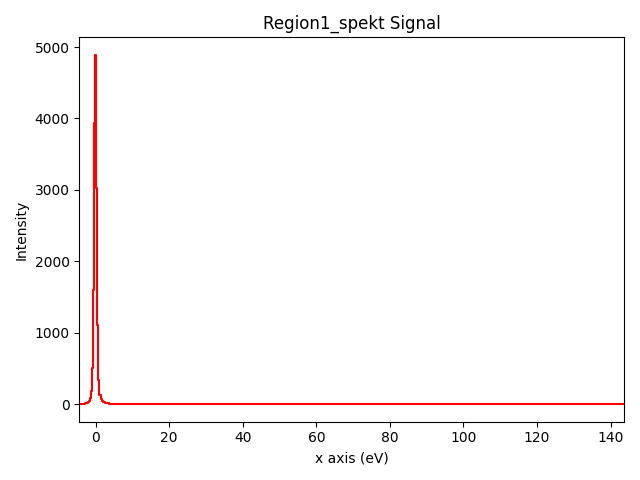

In [101]:
#fit the final model 
ZLP_model.plot()
plt.yscale("linear") # set "linear", "log", "symlog", "logit"




In [ ]:
Spekt1_deconvolved.richardson_lucy_deconvolution()

In [28]:
#extract ZLP peak by Fourier ratio deconvolution
#worth reading: https://doi.org/10.1016/j.ultramic.2009.05.011 --> uses the spectra of individual materials for deconvolution and for core loss analysis
ZLP.fourier_ratio_deconvolution(
    ll = Spekt1_background_sub, #bkg corrected low loss spectrum/ deconvolved low loss spectrum?
    fwhm=1,  # None
    threshold=2/Region1.axes_manager["x"].scale, 
    extrapolate_lowloss=True, #
    extrapolate_coreloss=True,
)


<EELSSpectrum, title: Region1_spekt after Fourier-ratio deconvolution, dimensions: (|503)>

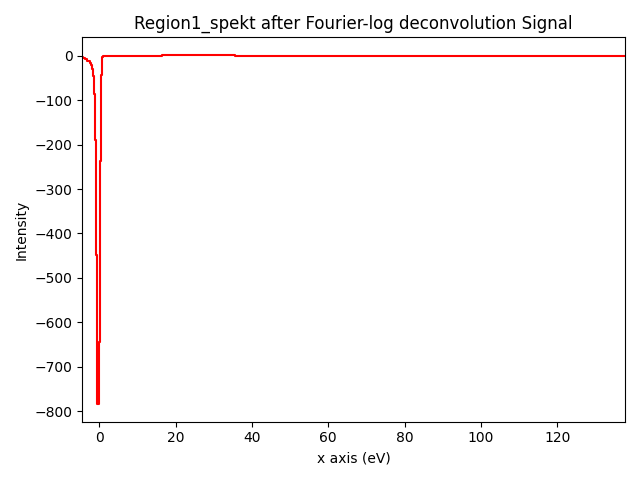

In [21]:

####
Spekt1_deconvolved_test = Spekt1_deconvolved.fourier_log_deconvolution(
    ZLP,
    add_zlp=False,
    crop=True,
)

Spekt1_deconvolved_test.plot()
plt.yscale("log") # set "linear", "log", "symlog", "logit"

In [55]:
#worth reading: https://doi.org/10.1016/j.ultramic.2009.05.011 --> uses the spectra of individual materials for deconvolution 

#remove plural scattering - no effect on low loss region --> should be used for core loss regions
Spekt1_deconvolved.fourier_ratio_deconvolution(
                                ll = ZLP, 
                                  fwhm=None,  # None
                                  threshold=None, 
                                  extrapolate_lowloss=False, #
                                  extrapolate_coreloss=False)

[########################################] | 100% Completed | 105.54 ms


<EELSSpectrum, title: Region1_spekt after Fourier-ratio deconvolution, dimensions: (|503)>

In [73]:
Region1.

<Model1D, title: Region1_spekt>

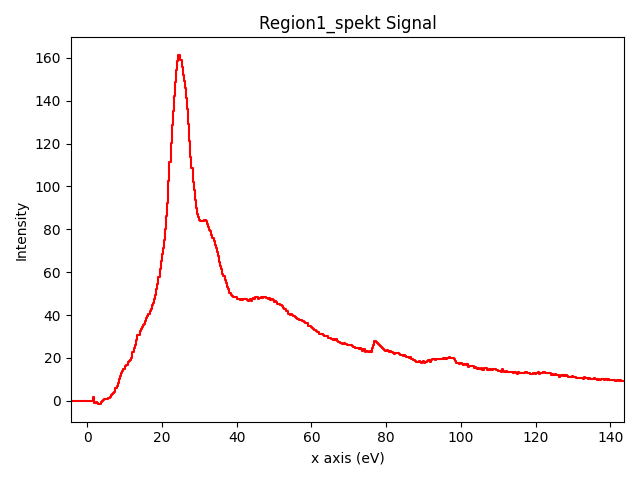

In [71]:
signal_background_corrected.plot()

In [74]:
Region1.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EELS
│       │       └── collection_angle = 15
│       ├── beam_energy = 200
│       └── convergence_angle = 21
├── General
│   ├── FileIO
│   │   └── 0
│   │       ├── hyperspy_version = 2.1.0
│   │       ├── io_plugin = rsciio.digitalmicrograph
│   │       ├── operation = load
│   │       └── timestamp = 2024-05-27T15:34:49.980550+02:00
│   ├── original_filename = Region1_spekt.dm3
│   └── title = Region1_spekt
└── Signal
    ├── Noise_properties
    │   └── Variance_linear_model
    │       ├── gain_factor = 1.0
    │       └── gain_offset = 0.0
    ├── quantity = Intensity
    └── signal_type = EELS

In [97]:
# add elements to the signal
Spekt1_calibrated.add_elements(('Al', 'O','C'))
Spekt1_calibrated

<EELSSpectrum, title: Region1_spekt, dimensions: (|503)>

In [98]:
Spekt1_calibrated.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EELS
│       │       └── collection_angle = 15
│       ├── beam_energy = 200
│       └── convergence_angle = 21
├── General
│   ├── FileIO
│   │   └── 0
│   │       ├── hyperspy_version = 2.1.0
│   │       ├── io_plugin = rsciio.digitalmicrograph
│   │       ├── operation = load
│   │       └── timestamp = 2024-05-27T16:01:15.872324+02:00
│   ├── original_filename = Region1_spekt.dm3
│   └── title = Region1_spekt
├── Sample
│   └── elements = ['O', 'C', 'Al']
└── Signal
    ├── Noise_properties
    │   └── Variance_linear_model
    │       ├── gain_factor = 1.0
    │       └── gain_offset = 0.0
    ├── quantity = Intensity
    └── signal_type = EELS

In [99]:



#create a model for the data
model = Spekt1_calibrated.create_model()
model

/home/massmeye/.conda/envs/ABTEM/lib/python3.11/site-packages/hyperspy/_components/power_law.py:156: RuntimeWarning: invalid value encountered in log
  r = 2 * (np.log(I1) - np.log(I2)) / (np.log(x2) - np.log(x1))


<EELSModel, title: Region1_spekt>

In [100]:
#look at all the components
model.components

   # |      Attribute Name |      Component Name |      Component Type
---- | ------------------- | ------------------- | -------------------
   0 |            PowerLaw |            PowerLaw |            PowerLaw
   1 |              Al_L23 |             Al_L2,3 |          EELSCLEdge
   2 |               Al_L1 |               Al_L1 |          EELSCLEdge

In [105]:
#enable fine strucutre 
model.enable_fine_structure()


In [106]:
# fit the model to the data
model.multifit(kind='smart')


WARNING | Hyperspy | Covariance of the parameters could not be estimated. Estimated parameter standard deviations will be np.nan. (hyperspy.model:1409)


/home/massmeye/.conda/envs/ABTEM/lib/python3.11/site-packages/hyperspy/drawing/signal1d.py:228: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(y_min, y_max)


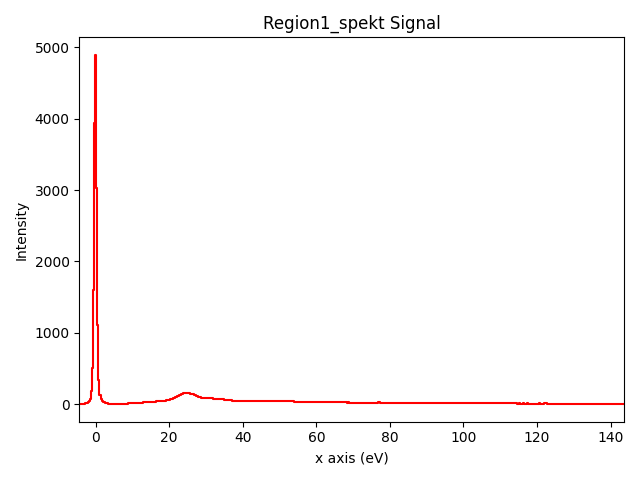

In [107]:
model.plot()
plt.yscale("log") # set "linear", "log", "symlog", "logit"

In [104]:
model.enable_adjust_position()

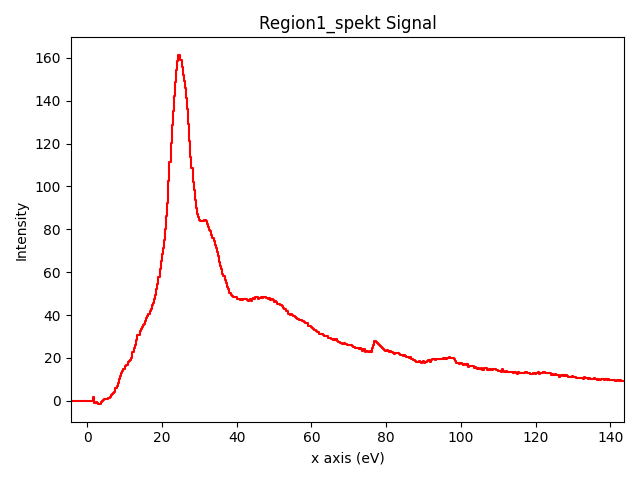

In [72]:
Region1.plot()
plt.yscale("log") # set "linear", "log", "symlog", "logit"

In [188]:
Region1.kramers_kronig_analysis??

Signature:
Region1.kramers_kronig_analysis(
    zlp=None,
    iterations=1,
    n=None,
    t=None,
    delta=0.5,
    full_output=False,
)
Source:   
    def kramers_kronig_analysis(
        self, zlp=None, iterations=1, n=None, t=None, delta=0.5, full_output=False
    ):
        r"""
        Calculate the complex dielectric function from a single scattering
        distribution (SSD) using the Kramers-Kronig relations.

        It uses the FFT method as in [1]_.  The SSD is an
        EELSSpectrum instance containing SSD low-loss EELS with no zero-loss
        peak. The internal loop is devised to approximately subtract the
        surface plasmon contribution supposing an unoxidized planar surface and
        neglecting coupling between the surfaces. This method does not account
        for retardation effects, instrumental broadening and surface plasmon
        excitation in particles.

        Note that either refractive index or thickness are required.
        If both are None or

In [184]:
signal_background_corrected, background_modell = Region1.remove_background(signal_range=(600,620), 
                    background_type='PowerLaw', #Doniach, Gaussian, Lorentzian, Offset, Polynomial, PowerLaw, Exponential, SkewNormal, SplitVoigt, Voigt
                    polynomial_order=5, # only used for type Polynomial
                    fast=True, 
                    zero_fill=False, #  True shuld be DM standard?
                    plot_remainder=False, 
                    show_progressbar=None, 
                    return_model=True,
                    display=False, 
                    toolkit=None)

/home/massmeye/.conda/envs/ABTEM/lib/python3.11/site-packages/hyperspy/_components/power_law.py:156: RuntimeWarning: invalid value encountered in log
  r = 2 * (np.log(I1) - np.log(I2)) / (np.log(x2) - np.log(x1))


## Further useful stuff --> GUI elements


In [49]:
# calibrate the energy scale interacttively --> only needed if calibration is not known
Region1.calibrate(display=True, toolkit=None)

/home/massmeye/.conda/envs/ABTEM/lib/python3.11/site-packages/jupyter_client/session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


In [48]:
#calibrate Spektrum with the axis manager, e.g. eV scale and ZLP position
Region1.axes_manager.gui()

In [50]:
## find the maximum position of the zero loss peak data
Position_ZLP = Region1.estimate_zero_loss_peak_centre()
Position_ZLP.data[0]


24.779999999999998

In [174]:
#reading the metadata of the spectrum
Region1.metadata

├── General
│   ├── FileIO
│   │   └── 0
│   │       ├── hyperspy_version = 2.1.0
│   │       ├── io_plugin = rsciio.digitalmicrograph
│   │       ├── operation = load
│   │       └── timestamp = 2024-05-24T16:09:08.682991+02:00
│   ├── original_filename = Region1_spekt.dm3
│   └── title = Region1_spekt
└── Signal
    ├── Noise_properties
    │   └── Variance_linear_model
    │       ├── gain_factor = 1.0
    │       └── gain_offset = 0.0
    ├── quantity = Intensity
    └── signal_type = EELS

In [ ]:
#cropping data

ZLP.crop_signal()

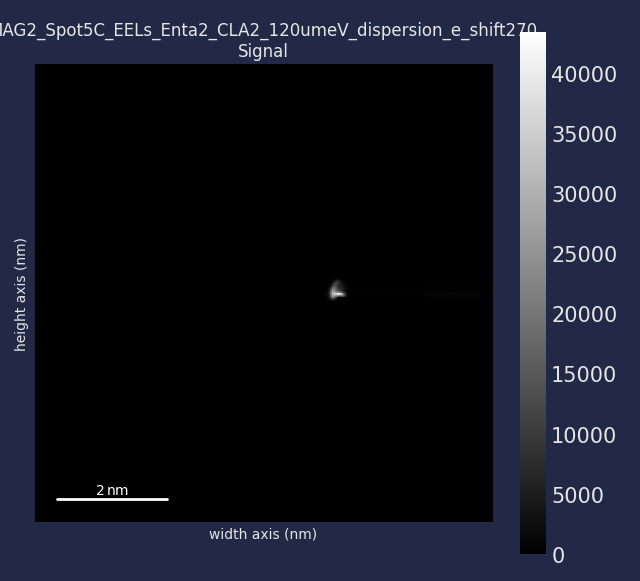

In [15]:
#apply rotation, if needed 
Ref_Spekt1.map(scipy.ndimage.rotate, angle=Rot_Angle, reshape=False) ## rotation angle for 300 um dispersion on TVIPS
Ref_Spekt1.plot()


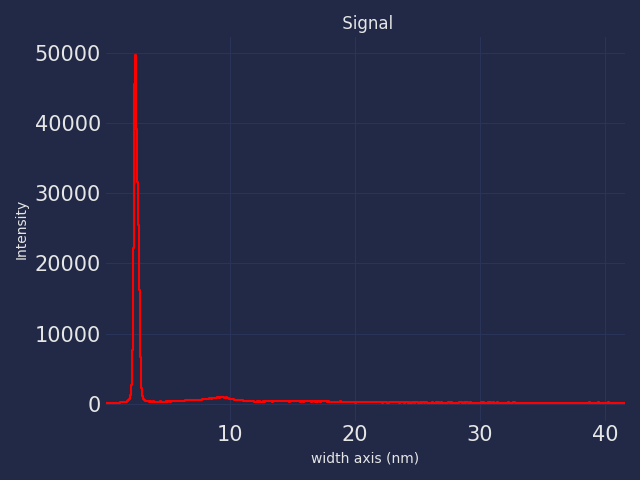

In [238]:
##extract the spectrum from the 2D spectrum
Region1 = Spekt2D.sum(axis=1)
Region1.plot()

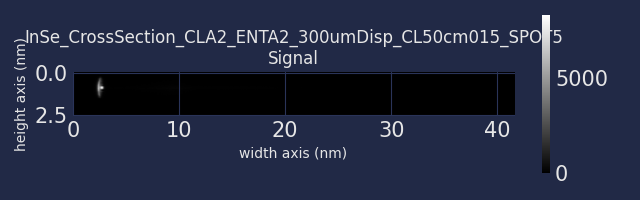

In [236]:
#visualize 2D spectrum: press "L" for log scale

Spekt2D.map(scipy.ndimage.rotate, angle=-0.4, reshape=False) ## rotation angle for 300 um dispersion on TVIPS
Spekt2D.plot()


In [237]:
##used for cropping of the data
Spekt2D.crop_signal(left=1, top=1, bottom=30) ## need to be set in units
